**Pulling Data**

In [13]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

api_key = 'LLSGCNAU6ZQMK8KL'
ts = TimeSeries(key=api_key, output_format='pandas')

# Get daily prices for Apple
data, meta_data = ts.get_daily(symbol='PLTR', outputsize='full')
data = data.sort_index()  # Ensure data is in ascending order by date



In [2]:
df=pd.DataFrame(data)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df

,Open,High,Low,Close,Volume
date,,,,,
1999-11-01,80.00,80.69,77.3700,77.62,2487300.0
1999-11-02,78.00,81.69,77.3100,80.25,3564600.0
1999-11-03,81.62,83.25,81.0000,81.50,2932700.0
1999-11-04,82.06,85.37,80.6200,83.62,3384700.0
1999-11-05,84.62,88.37,84.0000,88.31,3721500.0
...,...,...,...,...,...
2025-07-21,212.10,215.78,211.6300,212.48,51377434.0
2025-07-22,213.14,214.95,212.2301,214.40,46404072.0
2025-07-23,215.00,215.15,212.4100,214.15,46989301.0


In [4]:
close_data=df['Close']
close_data

date
1999-11-01     77.62
1999-11-02     80.25
1999-11-03     81.50
1999-11-04     83.62
1999-11-05     88.31
               ...  
2025-07-21    212.48
2025-07-22    214.40
2025-07-23    214.15
2025-07-24    213.76
2025-07-25    213.88
Name: Close, Length: 6472, dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data.values.reshape(-1, 1))

In [6]:
import numpy as np

sequence_length = 60  
x = []
y = []

for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i-sequence_length:i, 0])   
    y.append(scaled_data[i, 0])                     

x = np.array(x)
y = np.array(y)

# Reshape to (samples, timesteps, features) as LSTM expects — features=1 here
x = x.reshape((x.shape[0], x.shape[1], 1))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    shuffle=False  
)

In [8]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test)
)

c:\Users\avina\OneDrive\Desktop\DATA SCIENCE\deep learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0129 - val_loss: 0.0015
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 8.5826e-04 - val_loss: 0.0010
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.0363e-04 - val_loss: 0.0012
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.6378e-04 - val_loss: 8.8362e-04
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 7.4649e-04 - val_loss: 7.1568e-04
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 2.7146e-04 - val_loss: 5.8217e-04
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 8.5672e-04 - val_loss: 5.6251e-04
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 4.3803e-04 - val_loss: 4.9682e-04
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 5.5861e-04 - val_loss: 4.7480e-04
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 2.1944e-04 - val_loss: 4.5576e-04
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.1

In [9]:
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


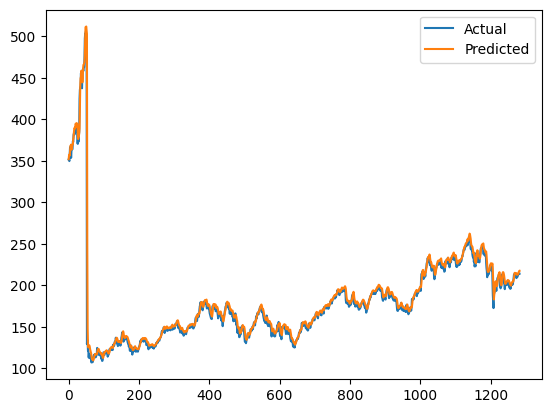

In [10]:
import matplotlib.pyplot as plt

plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:


last_60 = close_data.values[-sequence_length:]
last_60_scaled = scaler.transform(last_60.reshape(-1, 1))
x_input = last_60_scaled.reshape(1, sequence_length, 1)
next_day_pred_scaled = model.predict(x_input)
predicted_price = scaler.inverse_transform(next_day_pred_scaled)[0][0]
print(f'Predicted next close price: {predicted_price:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted next close price: 217.36
